### <span style="font-family:cursive"> Predicted machine learning model </span>

> ##### A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees 

#### <span style="font-family:cursive"> Dataset Source  </span>

> The data get from the IABAC for this project where the collected source is IABAC.It is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. INX human resource policies are considered as employee friendly and widely perceived as best practices in the industry

#### <span style="font-family:cursive">Needed Library Requried</span>

In [1]:
import pandas as pd
import numpy as np                                                         #--------->  data analysis library
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt                                          #--------->  visualization library
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score                  #----------> sklearn library
from imblearn.over_sampling import SMOTE


import warnings                                                        #---------> for warnings library
warnings.filterwarnings('ignore')

#### <span style="font-family:cursive">Dataset Information </span>

In [3]:
df = pd.read_excel('./INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls') 
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### <span style="font-family:cursive">Data preprocessing  </span>

In [4]:
df.isna().sum()               # there no NaN values are present in this dataset

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [5]:
df.describe()        # seeing the descriptive analysis value like mean mode median.

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [6]:
df.info()                 # Data type of each variable its consist categorical and numerical variable in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

#### <span style="font-family:cursive">Dataset unique values holding.. </span>

In [7]:
def all_col_unique(df):
    """
    This function lists all the unique values of all columns of dataframe in sorted manner.
    """
    for col in df:
        print("---------------")             # all unique values...
        print(f"{col}")
        print(sorted(df[col].unique()))
        print("\n")

In [8]:
all_col_unique(df)

---------------
EmpNumber
['E1001000', 'E1001006', 'E1001007', 'E1001009', 'E1001010', 'E1001011', 'E1001016', 'E1001019', 'E1001020', 'E1001021', 'E1001022', 'E1001024', 'E1001025', 'E1001027', 'E1001030', 'E1001035', 'E1001038', 'E1001040', 'E1001041', 'E1001042', 'E1001044', 'E1001047', 'E1001049', 'E1001050', 'E1001053', 'E1001054', 'E1001058', 'E1001059', 'E1001061', 'E1001062', 'E1001063', 'E1001064', 'E1001067', 'E1001069', 'E1001070', 'E1001071', 'E1001074', 'E1001075', 'E1001077', 'E1001078', 'E1001080', 'E1001081', 'E1001082', 'E1001083', 'E1001085', 'E1001086', 'E1001090', 'E1001091', 'E1001093', 'E1001094', 'E1001095', 'E1001097', 'E1001098', 'E1001101', 'E1001102', 'E1001104', 'E1001105', 'E1001106', 'E1001107', 'E1001110', 'E1001111', 'E1001112', 'E1001114', 'E1001115', 'E1001118', 'E1001120', 'E1001121', 'E1001122', 'E1001123', 'E1001124', 'E1001126', 'E1001128', 'E1001129', 'E1001130', 'E1001132', 'E1001134', 'E1001135', 'E1001140', 'E1001142', 'E1001143', 'E1001146', '

<span style="color:Green">The data is all ready clean and the dataset do not have any nan value</span>

#### <span style="font-family:cursive">Data Distribution</span>

In [9]:
numerical = []

for col, value in df.iteritems():
    if value.dtype == 'int64':
        numerical.append(col)

In [10]:
numerical

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

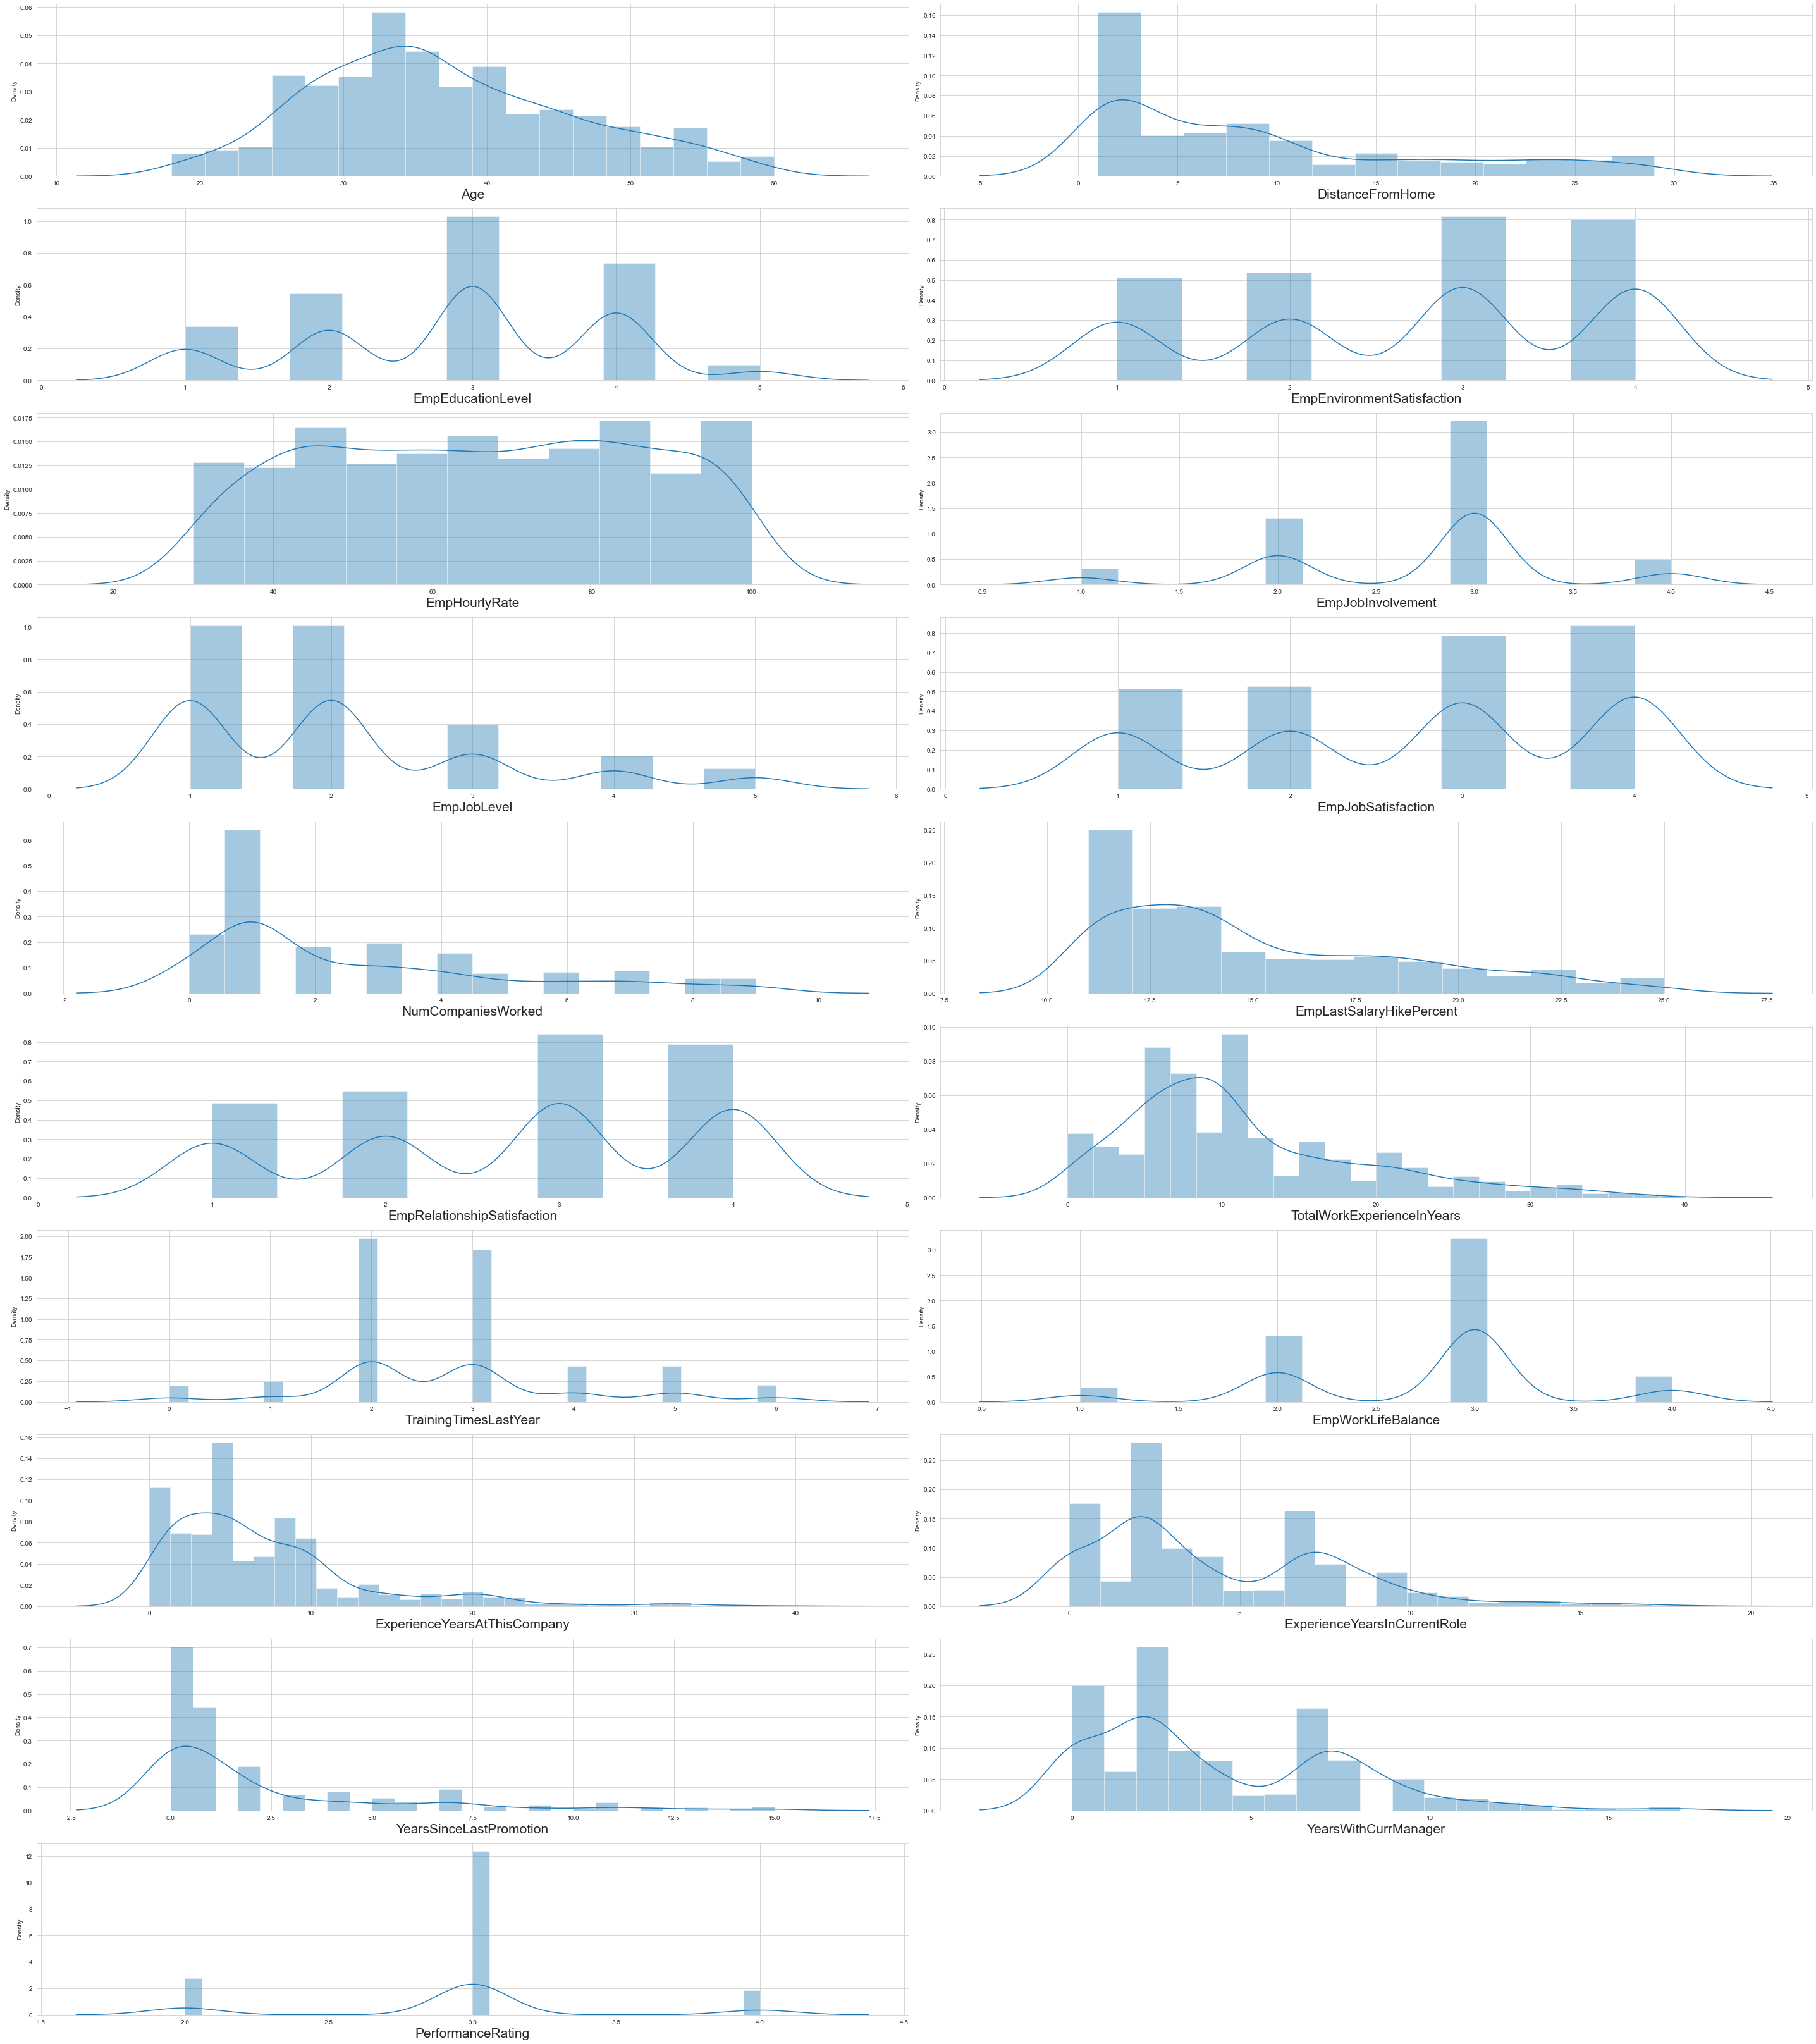

In [11]:
c=1
sns.set_style("whitegrid")
plt.figure(figsize=(40,45))
for i in numerical:
    plt.subplot(10,2,c)                            # data is not normally distributions
    sns.distplot(df[i])
    plt.xlabel(i,fontsize=21)
    c=c+1
    plt.tight_layout()
plt.show()

#### <span style="font-family:cursive"> Model Preparations</span>

     1. we split target variable and predictor variable.
     2. we will apply feature encoding technique to transfer catergorical values  to numberical values
     3. we will distribute the train data and validation data
     4. we are going to inlitization the model and train the model
     5 final part evalaute the model

#### <span style="font-family:cursive">One hot encoding for categorial features </span>

In [12]:
# Empty list to store columns with categorical data
categorical = []
for col, value in df.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = df.columns.difference(categorical)

In [13]:
pd.DataFrame(categorical)

,0
0,EmpNumber
1,Gender
2,EducationBackground
3,MaritalStatus
4,EmpDepartment
5,EmpJobRole
6,BusinessTravelFrequency
7,OverTime
8,Attrition


In [14]:
pd.DataFrame(numerical)

,0
0,Age
1,DistanceFromHome
2,EmpEducationLevel
3,EmpEnvironmentSatisfaction
4,EmpHourlyRate
5,EmpJobInvolvement
6,EmpJobLevel
7,EmpJobSatisfaction
8,EmpLastSalaryHikePercent
9,EmpRelationshipSatisfaction


In [15]:
# Store the categorical data in a dataframe called attrition_cat
original_cat = df[categorical]
original_cat = original_cat.drop(['EmpNumber'], axis=1) 

In [16]:
original_cat = pd.get_dummies(original_cat)
original_cat.head(3)

,Gender_Female,Gender_Male,EducationBackground_Human Resources,EducationBackground_Life Sciences,EducationBackground_Marketing,EducationBackground_Medical,EducationBackground_Other,EducationBackground_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0


#### <span style="font-family:cursive">Creating new features from Numerical data </span>

In [17]:
# Store the numerical features to a dataframe attrition_num
original_num = df[numerical]
original_num = original_num.drop(['PerformanceRating'], axis=1) # To remove the target column PerformanceRating 

In [18]:
# Concat the two dataframes together columnwise
original_final = pd.concat([original_num, original_cat], axis=1)
original_final.head(3)

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,32,10,3,4,55,3,2,4,12,4,...,0,0,0,0,0,1,1,0,1,0
1,47,14,4,4,42,3,2,1,12,4,...,0,0,0,0,0,1,1,0,1,0
2,40,5,4,4,48,2,3,1,21,3,...,0,0,0,0,1,0,0,1,1,0


In [19]:
dataframe = pd.concat([original_num,original_cat], axis=1)
dataframe.head(3)

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,32,10,3,4,55,3,2,4,12,4,...,0,0,0,0,0,1,1,0,1,0
1,47,14,4,4,42,3,2,1,12,4,...,0,0,0,0,0,1,1,0,1,0
2,40,5,4,4,48,2,3,1,21,3,...,0,0,0,0,1,0,0,1,1,0


#### <span style="font-family:cursive">Implementing Machine Learning Models </span>

> Having performed some exploratory data analysis and simple feature engineering as well as having ensured that all categorical values are encoded, we are now ready to proceed onto building our models.

>As alluded to in the introduction of this notebook, we will aim to evaluate and contrast the performances of a handful of different learning models.

#### <span style="font-family:Segoe Print">Splitting Data into Train and Test sets </span>
>But before we even start training a model, we will have to partition our dataset into a training set and a test set (unlike Kaggle competitions where the train and test data are already segregated for you). To split our data we will utilise sklearn's

In [20]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
target = df.loc[:,['PerformanceRating']] # Target Performance Rating 


# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_test = train_test_split(original_final, target, train_size= 0.75,random_state=0)

#### <span style="font-family:cursive">SMOTE to oversample due to the skewness in target </span>

>since we have already noted the severe imbalance in the values within the target variable, let us implement the SMOTE method in the dealing with this skewed value via the imblearn Python package

In [21]:
oversampler= SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(train,target_train)

### <span style="font-family:cursive">Model initialization </span>
> #### <span style="font-family:cursive">Random Forest Algorithm Model </span>
<div class="alert alert-block alert-warning"> <b>Note</b><br>The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.</div>

> #### <span style="font-family:cursive">Initialising Random Forest parameters </span> 
 - [X] **n_jobs:** The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors
 - [X] **n_estimators:** The number of trees in the forest. Default=100
 - [X] **warm_start:** When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
 - [X] **max_features:** The number of features to consider when looking for the best split.
 - [X] **max_depth:** The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
 - [X] **min_samples_leaf:** The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
 - [X] **random_state:** Controls both the randomness of the bootstrapping of the samples used when building trees and the sampling of the features to consider when looking for the best split at each node.
 - [X] **verbose:** Controls the verbosity when fitting and predicting.

 #### <span style="font-family:cursive">Initialising Random Forest parameters </span> 

In [22]:
# Random Forest parameters
seed = 0
rf_params = {
    'n_jobs': -1,
    'n_estimators': 800,
    'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 9,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [23]:
random_forest = RandomForestClassifier(**rf_params)

In [24]:
random_forest.fit(smote_train, smote_target)
print("Parameter are uploaded Random Forest as finished")

Parameter are uploaded Random Forest as finished


In [26]:
predictions = random_forest.predict(test)
print("Predictions finished")
pd.DataFrame(predictions)
pd.DataFrame(target_test)

Predictions finished


,PerformanceRating
198,3
328,3
45,3
263,3
621,3
...,...
668,3
839,3
117,3
359,4


 #### <span style="font-family:cursive">Model Evalutions </span> 

In [27]:
accuracy_score(target_test, predictions) # To find the accuracy of the Prediction Model 

0.9133333333333333